### Задача 1

#### Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

In [5]:
import numpy as np
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [6]:
p = 1/4 #вероятность угадать правильный ответ
q = 1 - p #обратная вероятность
n = 5 #количество вопросов
x = []
y = []

In [7]:
def combinations(n, p, q):
    for k in range (0, n):
        P = factorial(n) / (factorial(k) * factorial(n - k)) * p**k * q**(n-k)
        print (f'P = {P}, k = {k}')
        x.append(k)
        y.append(P)
    title_dict = {'fontsize': 14, 'fontweight': 'bold', 'color': '#404040'}
    label_dict = {'fontsize': 12, 'fontweight': 'normal', 'color': '#b0b0b0'}
    plt.title('Закон распределения числа правильных ответов', fontdict=title_dict, loc='center')
    plt.xlabel('Значения k', fontdict=label_dict)
    plt.ylabel('Значения P', fontdict=label_dict)
    plt.plot(x,y)
    plt.show()

P = 0.2373046875, k = 0
P = 0.3955078125, k = 1
P = 0.263671875, k = 2
P = 0.087890625, k = 3
P = 0.0146484375, k = 4


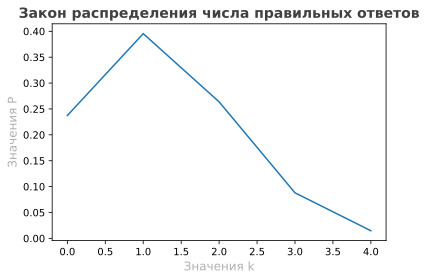

In [8]:
combinations(n, p, q)

In [9]:
M = p * n
print (f'M = {M}')

M = 1.25


In [10]:
D = p * n * q
print (f'D = {D}')

D = 0.9375


### Задача 2

#### Вероятность поймать рыбу при одном забрасывании удочки равна 0.01. Какова вероятность того, что число пойманных рыб при 200 забросах удочки будет не менее 5 и не более 10?

подходит формула Пуассона, так как вероятность мала, а количество попыток довольно велико

In [11]:
n = 200 # количество попыток
m = int # количество удачных попыток от 5 до 10 включительно
p = 0.01 # вероятность удачной попытки
lambda_ = n * p
summ = []

In [12]:
for m in range (5, 11):
    P = (lambda_**m / np.math.factorial(m)) * np.exp(-lambda_)
    print (f'P = {P}, k = {m}')
    summ.append(P)

P = 0.03608940886309672, k = 5
P = 0.012029802954365574, k = 6
P = 0.0034370865583901638, k = 7
P = 0.0008592716395975409, k = 8
P = 0.000190949253243898, k = 9
P = 3.8189850648779595e-05, k = 10


In [13]:
print (f'Вероятность: {sum(summ)}')

Вероятность: 0.052644709119342686


### Задача 3

#### В условиях предыдущей задачи сколько забросов удочки нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет поймана рыба? 
#### Подсказка. Как посчитать P(X >= k) для величины X, имеющей биномиальное распределение? Здесь предстоит немножко покодить.

In [18]:
k = 10 #количество удачных забросов
p = 0.01 # вероятность удачной попытки
n = 10 #минимальное количество попыток для того, чтобы поймать минимум 10 рыб
lambda_ = n * p
P = 0
#нужно подсчитать количество попыток n, чтобы вероятность P достигла 0.9, но я хз как это сделать

In [35]:
def poisson_proba(k, lambda_):
    return (lambda_ ** k) * np.exp(-lambda_) / np.math.factorial(k)

In [38]:
while P < 0.9:
    n += 1
    lambda_ = n * p  
    P = 1-sum(poisson_proba(k=i, lambda_=lambda_) for i in range(k))
print(n, P)

1421 0.9001760722984115
